In [110]:
#importing packages
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from Utility.IO import *


In [3]:
dic=load_dictionary()

In [4]:
dic.head()

,desc,category,name
0,Unit ID for institution,root,UNITID
1,8-digit OPE ID for institution,root,OPEID
2,6-digit OPE ID for institution,root,OPEID6
6,ZIP code,school,ZIP
10,Predominant degree awarded (recoded 0s and 4s),school,SCH_DEG


In [5]:
cat_list0=dic.category.unique()
cat_list=np.delete(cat_list0,[0,8])
cat_list

array([u'school', u'admissions', u'academics', u'student', u'cost', u'aid',
       u'completion', u'earnings'], dtype=object)

In [6]:
rpyrt=get_rpyrt_by_class(1)

C:\Users\b_luo\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2822: DtypeWarning: Columns (1,2,3,4,6,11,12,13,14,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,6

In [13]:
df=rpyrt
yname='RPY_'+ str(1) +'YR_RT'
cor=df.corr()
corr=abs(cor).sort_values([yname],ascending=0)[yname]

In [18]:
corr[corr>0.2]

RPY_1YR_RT                       1.000000
INC_PCT_H1                       0.815670
PELL_EVER                        0.808683
INC_PCT_LO                       0.801793
FAMINC                           0.787495
DEP_INC_PCT_H1                   0.784575
MD_FAMINC                        0.773515
DEP_INC_AVG                      0.773407
DEP_INC_PCT_LO                   0.763898
DEP_INC_PCT_H2                   0.751378
INC_PCT_M2                       0.744919
FEMALE_ENRL_ORIG_YR2_RT          0.740021
MALE_ENRL_ORIG_YR2_RT            0.737557
INC_PCT_H2                       0.730145
PELL_ENRL_ORIG_YR2_RT            0.728593
NOT1STGEN_ENRL_ORIG_YR2_RT       0.722130
NOPELL_ENRL_ORIG_YR2_RT          0.719735
PAR_ED_PCT_PS                    0.716503
NOLOAN_ENRL_ORIG_YR2_RT          0.713130
ENRL_ORIG_YR2_RT                 0.708280
FIRSTGEN_ENRL_ORIG_YR2_RT        0.707546
MD_INC_ENRL_ORIG_YR2_RT          0.691645
DEP_ENRL_ORIG_YR2_RT             0.688135
FIRST_GEN                        0

In [85]:
screen=prescreening_by_class(rpyrt,y=1,nobs=500)

In [69]:
dic=dic.loc[dic['name'].isin(screen),:]

In [36]:
pca = PCA(0.95)
variables=dic.loc[dic.category=='school','name']
XX=X.loc[:,np.array(variables)].fillna(0)
print XX.shape
print XX.head()
print XX/XX.std()
pca.fit(XX)
pca.explained_variance_ratio_

(35027, 32)
   ZIP  SCH_DEG  HCM2  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  \
0  0.0      3.0   0.0     1        0.0        3        4      1.0      0.0   
1  0.0      3.0   0.0     1        0.0        3        4      1.0      0.0   
2  0.0      3.0   0.0     1        0.0        3        4      2.0      0.0   
3  0.0      3.0   0.0     1        0.0        3        4      1.0      0.0   
4  0.0      3.0   0.0     1        0.0        3        4      1.0      0.0   

   REGION   ...     MENONLY  WOMENONLY  RELAFFIL  DISTANCEONLY  CURROPER  \
0     0.0   ...         0.0        0.0       0.0           0.0       0.0   
1     0.0   ...         0.0        0.0       0.0           0.0       0.0   
2     0.0   ...         0.0        0.0       0.0           0.0       0.0   
3     0.0   ...         0.0        0.0       0.0           0.0       0.0   
4     0.0   ...         0.0        0.0       0.0           0.0       0.0   

   TUITFTE  INEXPFTE  AVGFACSAL  PFTFAC  ICLEVEL  
0      0.0 

array([ 0.99999974])

In [70]:
X=rpyrt[screen].fillna(0)
print X.shape
X=X/X.std()
print X.shape

(35027, 300)
(35027, 300)


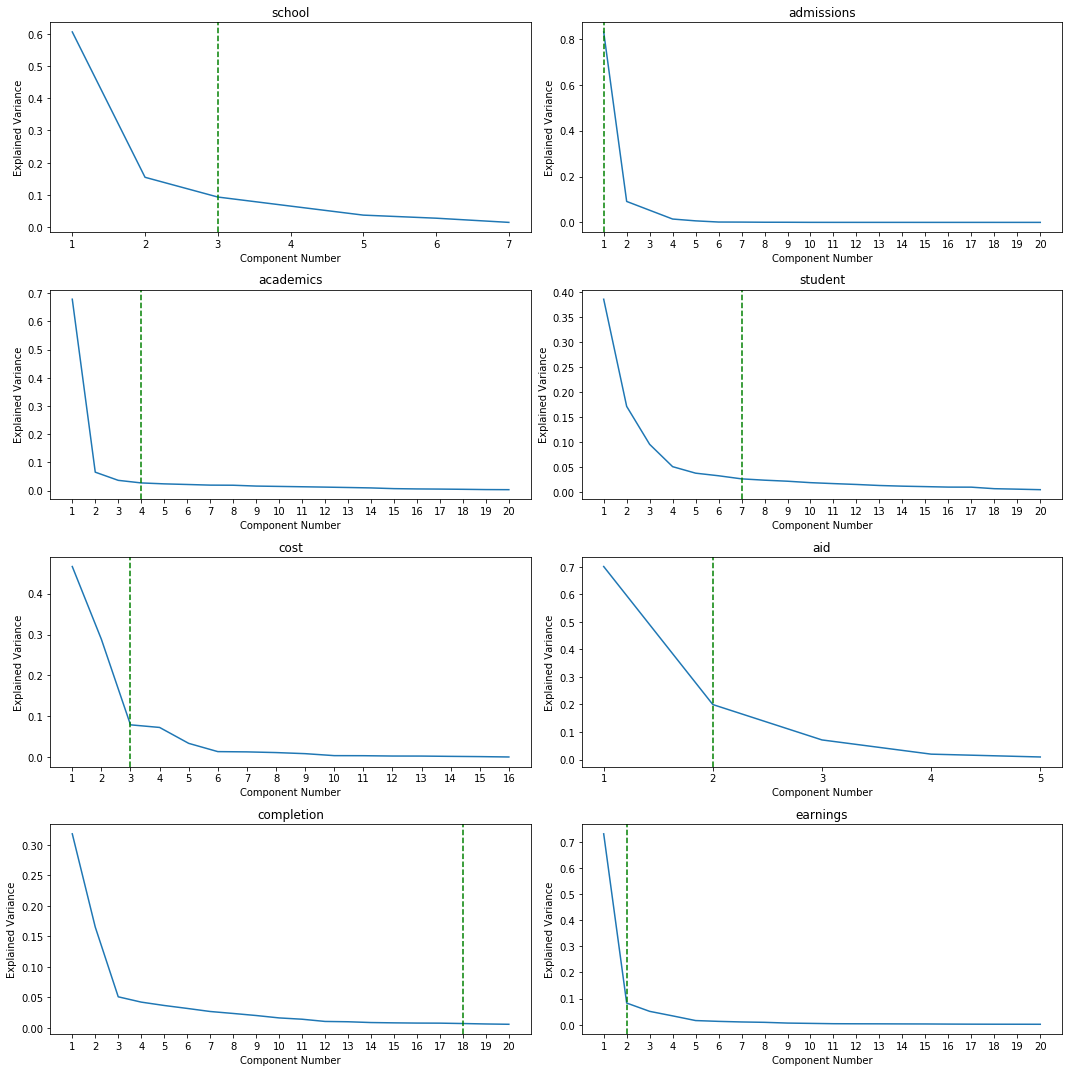

In [131]:
#pca = PCA(n_components=3)
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(15,15))
ncom=[3,2,4,7,3,2,12,5]
i=0
for cat in cat_list:
    variables=dic.loc[dic.category==cat,'name']
    XX=X.loc[:,np.array(variables)].fillna(0)
    pca=PCA(n_components=min(XX.shape[1],20))
    pca.fit(XX)
    ax=axes[i/2,i%2]
    ax.plot(range(1,(pca.n_components_+1)),pca.explained_variance_ratio_,label="x")
    ax.set_xlabel('Component Number')
    ax.set_ylabel('Explained Variance')
    ax.set_xticks(range(1,(pca.n_components_+1)))
    ax.set_title(cat)
    ax.axvline(PCA(0.8).fit(XX).n_components_,linestyle='--',color='g')
    #ax.axvline(ncom[i],linestyle='--',color='g')
    i=i+1
plt.tight_layout()

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)


In [ ]:
print variables

In [ ]:
len(variables)